In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rsot import RSOT, EntropicRSOT
from rsot import exact_rsot
from rsot import calc_f_rsot, calc_logB, calc_B
from sinkhorn import calc_U, calc_k_formula, robust_semisinkhorn_eps
from utils import norm_inf

import time

In [2]:
# Dimension
n = 100

# Regularization
tau = np.float64(1.0)

In [3]:
np.random.seed(3698)

# Cost matrix
C = np.random.uniform(low=1.0, high=50.0, size=(n, n)).astype(np.float64)
C = (C + C.T) / 2.0

# Marginal vectors
a = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)
b = np.random.uniform(0.1, 1.0, size=n).astype(np.float64)

a = a / a.sum()
b = b / b.sum()

In [4]:
# Original UOT problem
rsot = RSOT(C, a, b, tau)

# Optimal solution
f_optimal, X_optimal = exact_rsot(rsot)

print('Optimal:', f_optimal)

Optimal: 4.283035963992407


Epsilon 0: 0.049999999999999996
0 1.0000000000000002
1000 4.284510076155277


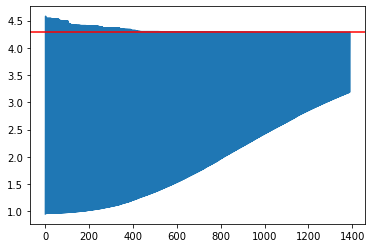

Time elapsed: 0.7512164115905762
Epsilon 1: 0.023207944168063894
0 1.0000000000000002
1000 4.297883541662286


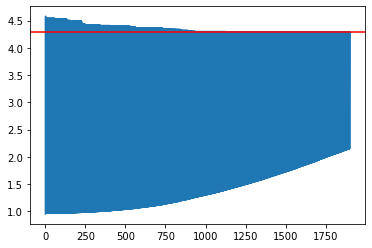

Time elapsed: 0.9416918754577637
Epsilon 2: 0.010772173450159421
0 1.0000000000000002
1000 4.397522967419795
2000 4.302023127780849
3000 4.294995827188101
4000 4.285566625824949


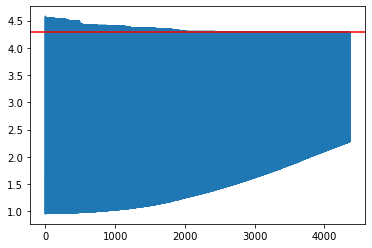

Time elapsed: 1.8678715229034424
Epsilon 3: 0.004999999999999999
0 1.0000000000000002
1000 4.490196981359362
2000 4.399170099371638
3000 4.3671660182080485
4000 4.318846286212845
5000 4.297883080111615
6000 4.296369742935133
7000 4.293818298233738
8000 4.287092932781439


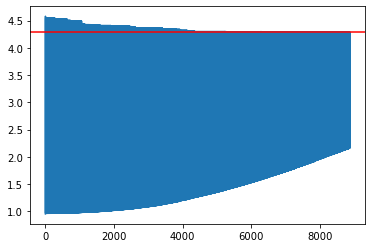

Time elapsed: 3.5432887077331543
Epsilon 4: 0.0023207944168063908
0 1.0000000000000002
1000 4.533266951080056
2000 4.4910459307712465
3000 4.417949008238866
4000 4.40815736794345
5000 4.3975220089859395
6000 4.367166010030769
7000 4.366503817324329
8000 4.338924332912949
9000 4.309352968635813
10000 4.297883063664421
11000 4.297883063661815
12000 4.296369726175
13000 4.296369726175805
14000 4.294999833911521
15000 4.293818279460868
16000 4.289788194334313
17000 4.287100647884159
18000 4.2856942263613425
19000 4.2853185863027266


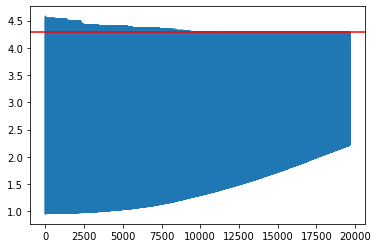

Time elapsed: 7.509974002838135
Epsilon 5: 0.0010772173450159421
0 1.0000000000000002
1000 4.540751927079044
2000 4.533266950551467
3000 4.502514749448017
4000 4.493432725411069
5000 4.439136164669517
6000 4.425070761988957
7000 4.413682065469185
8000 4.408157367175189
9000 4.399170094953431
10000 4.397522943796434
11000 4.396334067377748
12000 4.3846196723344715
13000 4.367166008249633
14000 4.367166008250133
15000 4.366503676891125
16000 4.343486943322384
17000 4.3389243290752075
18000 4.336729434788403
19000 4.318846263708875
20000 4.302023165404593
21000 4.2978830600321
22000 4.297883060029765
23000 4.297883060031786
24000 4.297883060032446
25000 4.2963697224755775
26000 4.296369722474999
27000 4.296369722469792
28000 4.296369722475505
29000 4.296369722475144
30000 4.294999951438708
31000 4.293818275324543
32000 4.293818275316497
33000 4.293818275323286
34000 4.289788189860357
35000 4.2897881898606425
36000 4.289788189859113
37000 4.287092903952342
38000 4.285694221235528
39000 4.2

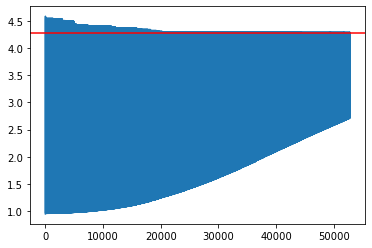

Time elapsed: 19.91958475112915
Epsilon 6: 0.0004999999999999999
0 1.0000000000000002
1000 4.540751926959541
2000 4.540751926966453
3000 4.533266950443138
4000 4.533266950436368
5000 4.526651323144998
6000 4.526651323138707
7000 4.501603038035362
8000 4.4934327252527515
9000 4.493432725254815
10000 4.490196593510113
11000 4.439136164524723
12000 4.425193317985676
13000 4.4250707618388665
14000 4.415046712172618
15000 4.413682065285811
16000 4.408159609795984
17000 4.4081573670063285
18000 4.40815736701577
19000 4.408157367013027
20000 4.399170094778812
21000 4.3975229436170835
22000 4.397522943618574
23000 4.397522943634566
24000 4.396334067207449
25000 4.3883548999363216
26000 4.384619672152339
27000 4.36716600786425
28000 4.367166007882381
29000 4.367166007873392
30000 4.367166007866924
31000 4.367166007865023
32000 4.366503659793088
33000 4.366503653460687
34000 4.3665036534529635
35000 4.343486942472219
36000 4.343486941903121
37000 4.338924328292243
38000 4.338924328289996
39000 4

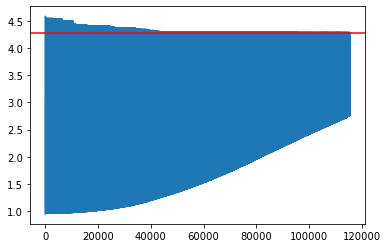

Time elapsed: 43.133143186569214
Epsilon 7: 0.00023207944168063908
0 1.0000000000000002
1000 4.540751926931421
2000 4.540751926939196
3000 4.540751926967263
4000 4.540751926958363
5000 4.540751926942941
6000 4.540751926956605
7000 4.533266950426936
8000 4.5332669504208
9000 4.533266950417188
10000 4.533266950420132
11000 4.526651323088294
12000 4.526651323103046
13000 4.526651323113419
14000 4.501603038039237
15000 4.501603037996921
16000 4.493432725213914
17000 4.493432725244286
18000 4.493432725198759
19000 4.493432725199964
20000 4.4902003894125295
21000 4.490196593443173
22000 4.489571801947407
23000 4.439136164482638
24000 4.439136164504982
25000 4.425193334313766
26000 4.425193317865007
27000 4.425070761792811
28000 4.425070761809478
29000 4.419556459816318
30000 4.41794953657097
31000 4.413682065250737
32000 4.41368206521093
33000 4.413682065281759
34000 4.413682065237416
35000 4.408157366974115
36000 4.40815736698954
37000 4.408157366986111
38000 4.408157366965638
39000 4.40815

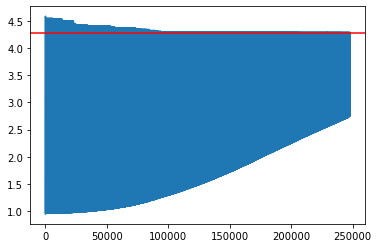

Time elapsed: 93.45578455924988
Epsilon 8: 0.00010772173450159421
0 1.0000000000000002
1000 4.540751926895477
2000 4.540751926951286
3000 4.540751926951944
4000 4.540751926920126
5000 4.540751926910669
6000 4.540751926945408
7000 4.5407519269409535
8000 4.5407519269685235
9000 4.5407519269130105
10000 4.540751926936723
11000 4.540751926907759
12000 4.540751926915581
13000 4.540751926966941
14000 4.533266950451429
15000 4.533266950393643
16000 4.533266950394143
17000 4.533266950440026
18000 4.533266950464231
19000 4.533266950435994
20000 4.533266950370489
21000 4.5332669504518615
22000 4.533266950422713
23000 4.52665132314007
24000 4.52665132314554
25000 4.526651323110011
26000 4.5266513231299585
27000 4.526651323146348
28000 4.5266513230948044
29000 4.526651323045445
30000 4.502529795453269
31000 4.501603037993692
32000 4.501603038037508
33000 4.501603038033847
34000 4.493432725179703
35000 4.4934327252605915
36000 4.49343272523501
37000 4.493432725247446
38000 4.493432725190112
39000 

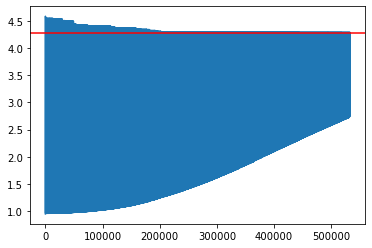

Time elapsed: 202.5164041519165
Epsilon 9: 4.9999999999999996e-05
0 1.0000000000000002
1000 4.54075192700987
2000 4.540751927012823
3000 4.5407519268972845
4000 4.540751926963762
5000 4.540751926840465
6000 4.540751926954082
7000 4.540751926989263
8000 4.540751926885436
9000 4.5407519268804934
10000 4.540751926852452
11000 4.540751926998523
12000 4.5407519270345125
13000 4.540751926942036
14000 4.54075192693034
15000 4.540751926979968
16000 4.540751927001576
17000 4.540751926908404
18000 4.540751926993653
19000 4.540751926935601
20000 4.5407519269723435
21000 4.5407519269221215
22000 4.540751926866366
23000 4.540751926891899
24000 4.540751927116778
25000 4.540751926960707
26000 4.540751926970955
27000 4.540751927050303
28000 4.5407519269479675
29000 4.533266950506723
30000 4.533266950496976
31000 4.533266950355627
32000 4.5332669503266025
33000 4.533266950417403
34000 4.533266950450709
35000 4.533266950496967
36000 4.533266950421417
37000 4.533266950425185
38000 4.533266950448612
39000

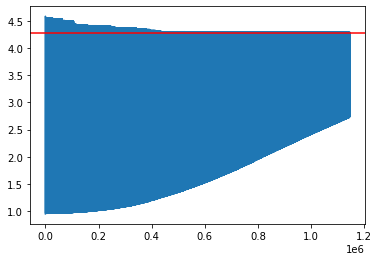

Time elapsed: 440.91783809661865


In [5]:
# Number of eps
neps = 10

# Epsilons
eps_arr = np.logspace(start=np.log10(5e-2), stop=np.log10(5e-5), num=neps).astype(np.float64)

kfs, kcs = np.zeros((2, neps))

for i, eps in enumerate(eps_arr):
    print(f'Epsilon {i}:', eps)
    start = time.time()

    # Entropic regularization parameter
    U = calc_U(rsot, eps)
    eta = eps / U

    # Convert to Entropic Regularized UOT
    ersot = EntropicRSOT(C, a, b, tau, eta)

    # Sinkhorn
    _, log = robust_semisinkhorn_eps(ersot, f_optimal, eps, 
                                     patience=1000,
                                     save_uv=False, verbose=True)
    
    plt.plot(log['f'][1:])
    plt.axhline(f_optimal, color='red')
    plt.show()

    # Find k
    kfs[i] = calc_k_formula(ersot, eps)
    kcs[i] = len(log['f']) - 1000

    print('Time elapsed:', time.time() - start)
    print('=================')

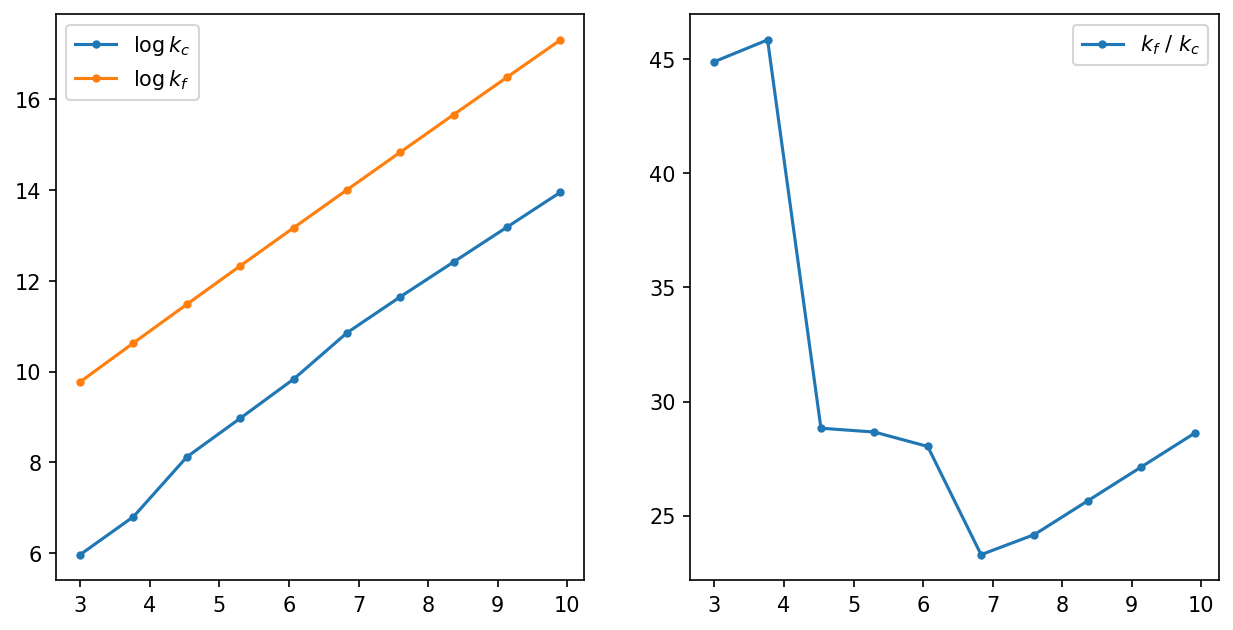

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

ax[0].plot(np.log(1 / eps_arr), np.log(kcs), marker='.', label='$\log k_c$')
ax[0].plot(np.log(1 / eps_arr), np.log(kfs), marker='.', label='$\log k_f$')
ax[0].legend()

ax[1].plot(np.log(1 / eps_arr), kfs / kcs, marker='.', label='$k_f$ / $k_c$')
ax[1].legend()

In [14]:
kfs.astype(np.int32) / kcs.astype(np.int32)

array([44.89769821, 45.85603544, 28.82942051, 28.66209872, 28.02973798,
       23.28419691, 24.16713683, 25.64736857, 27.12867956, 28.61032468])